In [1]:
from uproot_io import Events, View
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
titlesize = 20
labelsize = 14

In [2]:
# Interaction type lookup
import csv
interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction

In [3]:
events = Events(r"C:\Users\andre\Desktop\Physics Project\bigdata\PandoraRecoFile_1.root")

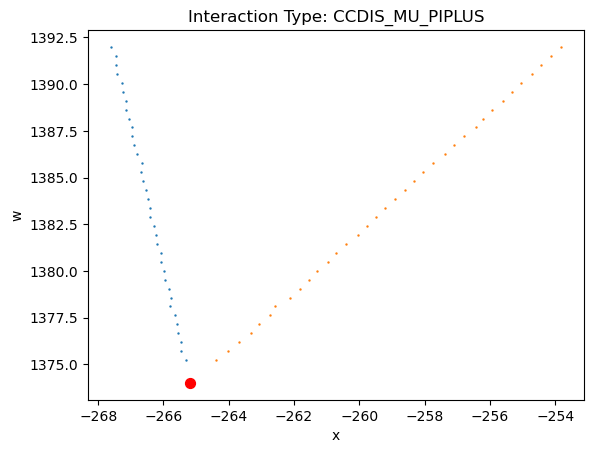

In [4]:
def plotparticles(event_number):
    idx = np.where(events.event_number == event_number)[0]
    
    for i in idx:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        plt.scatter(x, z, s=0.5)
    
    vx = events.true_neutrino_vtx_x[idx[0]]
    vz = events.true_neutrino_vtx_w[idx[0]]
    plt.scatter(vx, vz, c='red', s=50)
    
    typ = events.interaction_type[idx[0]]
    name = interaction_dictionary[typ]
    
    plt.title(f'Interaction Type: {name}')
    plt.xlabel('x')
    plt.ylabel('w')

plotparticles(100)

[37.29904     0.7773491   0.31793213  0.15995456  0.27420563  0.2828115
  0.1237082   0.22510864  0.48108292  0.09353419  0.16494751  0.5305032 ]


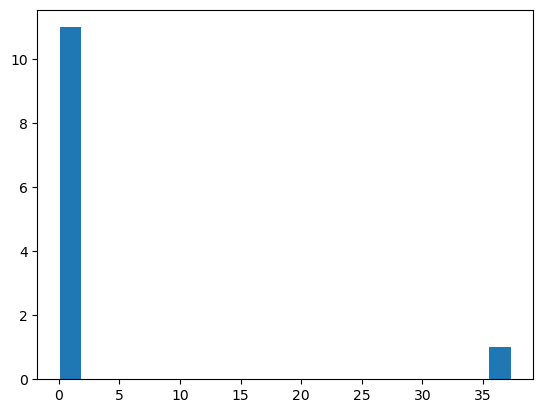

In [5]:
def straightlinefit(event_number):
    idx = np.where(events.event_number == event_number)[0]
    #v = 1
    residuals = []
    
    for i in idx:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        #plt.scatter(x, z, s=0.5)
        
        fit = np.polyfit(x, z, 1)
        y = (fit[0]*x) + fit[1]
        #plt.plot(x, y)
        
        res = np.abs(z - y)
        mean = np.mean(res)
        #print(f"Particle {v}:", mean)
        #v += 1
        residuals.append(mean)
    return np.array(residuals)

numbers = straightlinefit(6)
print(numbers)
plt.hist(numbers, 21)
plt.show()

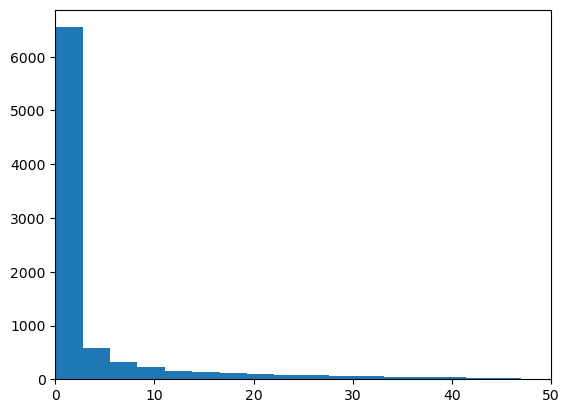

{0.71248084, 0.29948542, 0.8018355, 0.79609025, 1.1201072, 0.04402669, 0.05460205, 0.08327637, 0.2931315, 0.50015277, 0.695362, 4.393743, 0.18311565, 8.12968, 0.07099797, 2.015964, 3.8653553, 2.0474741, 3.7203581, 19.189236, 2.7920706, 14.321132, 3.9149964, 23.698317, 3.125537, 3.7642488, 5.7981157, 5.474192, 19.432577, 4.5641885, 5.860524, 0.1237082, 0.22510864, 0.48108292, 0.093534194, 0.16494751, 0.30233213, 0.15995456, 0.27420563, 0.2828115, 0.20164871, 37.29904, 39.54526, 7.5631065, 43.635086, 44.166588, 45.674, 9.527381, 40.98672, 9.393681, 46.203815, 10.709598, 10.953403, 10.070079, 9.005518, 10.465601, 2.4341047, 2.6789603, 2.6019852, 11.133162, 11.614067, 2.0080657, 11.555865, 11.379049, 2.686231, 2.657304, 12.588547, 13.220392, 13.99151, 62.589645, 13.293668, 14.132348, 13.717932, 69.956696, 14.493599, 14.24084, 14.386873, 15.048933, 14.872595, 14.722692, 71.40618, 3.4716141, 3.1223984, 16.922321, 3.1156056, 3.7718089, 3.6519573, 3.159168, 3.0754654, 3.4648871, 16.33529, 90.6

In [6]:
def straightlinefit():
    #idx = events.event_number
    residuals = []
    
    for i in events.event_number:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        
        if x.size == 0:
            continue
        else:
            fit = np.polyfit(x, z, 1)
            y = (fit[0]*x) + fit[1]
            
            res = np.abs(z - y)
            mean = np.mean(res)
            residuals.append(mean)
    return np.array(residuals)

numbers = straightlinefit()
number1 = set(numbers)
plt.hist(number1, 100)
plt.xlim(0, 50)
plt.show()